In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import math

In [60]:
data = np.genfromtxt("visc_vs_time.txt")
time = data[:,0]
visc = data[:,1]

In [16]:
def block(vector):
    n = len(vector)
    n_prime = math.ceil(int(n/2))
    x_prime = np.zeros(n_prime)
    for i in range(0,n_prime):
        x_prime[i] = 0.5*(vector[2*i] + vector[2*i+1])
    return x_prime,n_prime

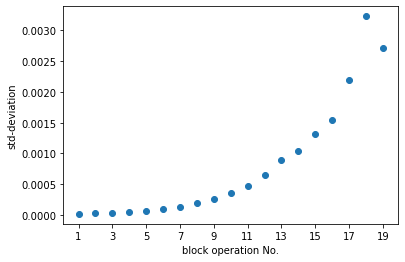

In [70]:
n_prime = math.ceil(int(len(data)/2))
temp_vec = visc
count = []
var_test = []
sig_test = []
i=0
while n_prime>2:
    t_vec,n_prime = block(temp_vec)
    var_test.append(np.var(t_vec)/(n_prime-1))
    sig_test.append(np.std(t_vec)/np.sqrt(n_prime-1))
    temp_vec = t_vec
    i = i+1
    count.append(i)
plt.plot(count,sig_test,'o')
plt.ylabel('std-deviation')
plt.xticks(np.arange(1,count[-1]+1,2))
plt.xlabel('block operation No.')
plt.savefig('block.png',dpi = 600)